In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df=pd.read_csv("/content/drive/MyDrive/Uber Request Data.csv")
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [ ]:
df.shape


(6745, 6)

In [ ]:
df.isnull()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
6740,False,False,True,False,False,True
6741,False,False,True,False,False,True
6742,False,False,True,False,False,True
6743,False,False,True,False,False,True


In [ ]:
a=df.isnull().sum()
a

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914


In [ ]:
perc=(a/(df.shape[0]))*100
perc

,0
Request id,0.000000
Pickup point,0.000000
Driver id,39.288362
Status,0.000000
Request timestamp,0.000000
Drop timestamp,58.028169


In [ ]:
df.dtypes

,0
Request id,int64
Pickup point,object
Driver id,float64
Status,object
Request timestamp,object
Drop timestamp,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [ ]:
df['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

In [ ]:
b=df['Status'].unique()
print(b)

['Trip Completed' 'Cancelled' 'No Cars Available']


In [ ]:
df['Status'].value_counts()

,count
Status,
Trip Completed,2831
No Cars Available,2650
Cancelled,1264


In [ ]:
df['Drop timestamp'] = df['Drop timestamp'].astype("string")
df['Request timestamp'] = df['Drop timestamp'].astype("string")
print(df.dtypes)



Request id                    int64
Pickup point                 object
Driver id                   float64
Status                       object
Request timestamp    string[python]
Drop timestamp       string[python]
dtype: object


In [ ]:
df[['Request date', 'Request time']] = df['Request timestamp'].str.split(' ', expand=True)
df.head()



,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time
0,619,Airport,1.0,Trip Completed,11/7/2016 13:00,11/7/2016 13:00,11/7/2016,13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 18:47,11/7/2016 18:47,11/7/2016,18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:58,12/7/2016 9:58,12/7/2016,9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 22:03,12/7/2016 22:03,12/7/2016,22:03
4,3112,City,1.0,Trip Completed,13-07-2016 09:25:47,13-07-2016 09:25:47,13-07-2016,09:25:47


In [ ]:
df[['Drop date', 'Drop time']] = df['Drop timestamp'].str.split(' ', expand=True)
print(df)

      Request id Pickup point  Driver id             Status  \
0            619      Airport        1.0     Trip Completed   
1            867      Airport        1.0     Trip Completed   
2           1807         City        1.0     Trip Completed   
3           2532      Airport        1.0     Trip Completed   
4           3112         City        1.0     Trip Completed   
...          ...          ...        ...                ...   
6740        6745         City        NaN  No Cars Available   
6741        6752      Airport        NaN  No Cars Available   
6742        6751         City        NaN  No Cars Available   
6743        6754         City        NaN  No Cars Available   
6744        6753      Airport        NaN  No Cars Available   

        Request timestamp       Drop timestamp Request date Request time  \
0         11/7/2016 13:00      11/7/2016 13:00    11/7/2016        13:00   
1         11/7/2016 18:47      11/7/2016 18:47    11/7/2016        18:47   
2          12/7

In [ ]:
df['Request date'] = df['Request date'].str.replace('/', '-')
df['Drop date'] = df['Drop date'].str.replace('/', '-')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Drop date,Drop time
0,619,Airport,1.0,Trip Completed,11/7/2016 13:00,11/7/2016 13:00,11-7-2016,13:00,11-7-2016,13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 18:47,11/7/2016 18:47,11-7-2016,18:47,11-7-2016,18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:58,12/7/2016 9:58,12-7-2016,9:58,12-7-2016,9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 22:03,12/7/2016 22:03,12-7-2016,22:03,12-7-2016,22:03
4,3112,City,1.0,Trip Completed,13-07-2016 09:25:47,13-07-2016 09:25:47,13-07-2016,09:25:47,13-07-2016,09:25:47


In [ ]:
df['Request date'] = df['Request date'].astype('datetime64[ns]')
df['Drop date'] = df['Drop date'].astype('datetime64[ns]')
df['Request time'] = df['Request time'].astype('datetime64[ns]')
df['Drop time'] = df['Drop time'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  2831 non-null   string        
 5   Drop timestamp     2831 non-null   string        
 6   Request date       2831 non-null   datetime64[ns]
 7   Request time       2831 non-null   datetime64[ns]
 8   Drop date          2831 non-null   datetime64[ns]
 9   Drop time          2831 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(2), string(2)
memory usage: 527.1+ KB


In [ ]:
def timeofday(hour):
  if 0<=hour<6:
    return 'Midnight'
  elif 6<=hour<12:
    return 'Early Morning'
  elif 12<=hour<16:
    return 'Noon'
  elif 16<=hour<18:
    return 'Afternoon'
  elif 18<=hour<22:
    return 'Evening'
  else:
    return 'Night'
df['Request time of day'] = df['Request time'].dt.hour.apply(timeofday)
df['Drop time of day'] = df['Drop time'].dt.hour.apply(timeofday)
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request date,Request time,Drop date,Drop time,Request time of day,Drop time of day
0,619,Airport,1.0,Trip Completed,11/7/2016 13:00,11/7/2016 13:00,2016-11-07,2024-10-29 13:00:00,2016-11-07,2024-10-29 13:00:00,Noon,Noon
1,867,Airport,1.0,Trip Completed,11/7/2016 18:47,11/7/2016 18:47,2016-11-07,2024-10-29 18:47:00,2016-11-07,2024-10-29 18:47:00,Evening,Evening
2,1807,City,1.0,Trip Completed,12/7/2016 9:58,12/7/2016 9:58,2016-12-07,2024-10-29 09:58:00,2016-12-07,2024-10-29 09:58:00,Early Morning,Early Morning
3,2532,Airport,1.0,Trip Completed,12/7/2016 22:03,12/7/2016 22:03,2016-12-07,2024-10-29 22:03:00,2016-12-07,2024-10-29 22:03:00,Night,Night
4,3112,City,1.0,Trip Completed,13-07-2016 09:25:47,13-07-2016 09:25:47,2016-07-13,2024-10-29 09:25:47,2016-07-13,2024-10-29 09:25:47,Early Morning,Early Morning


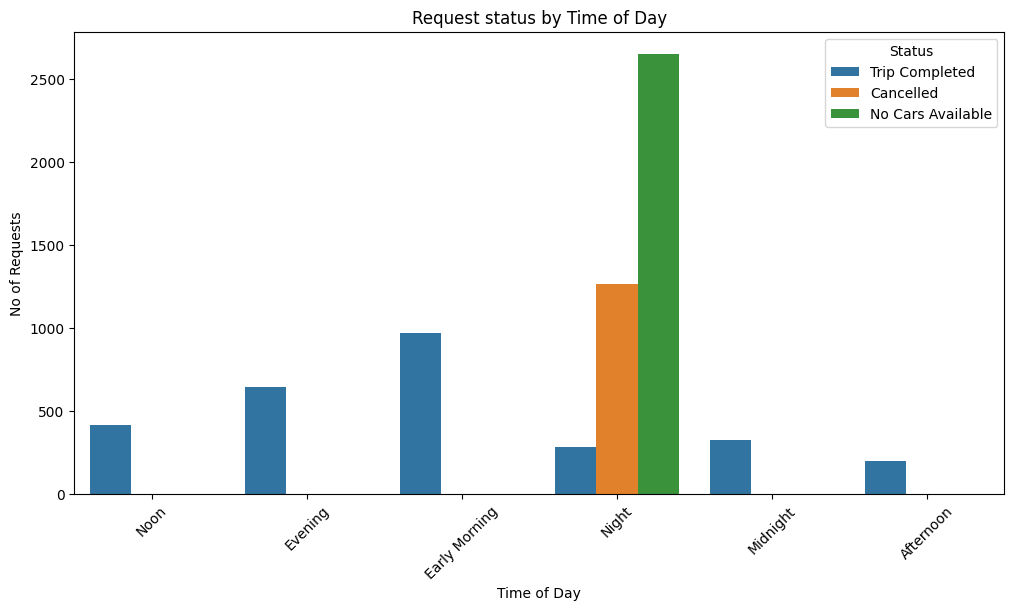

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='Request time of day',hue='Status',data=df)
plt.title('Request status by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('No of Requests')
plt.xticks(rotation=45)
plt.legend(title='Status')

plt.show()